In [1]:
import plotly.graph_objects as go
from numpy import linspace

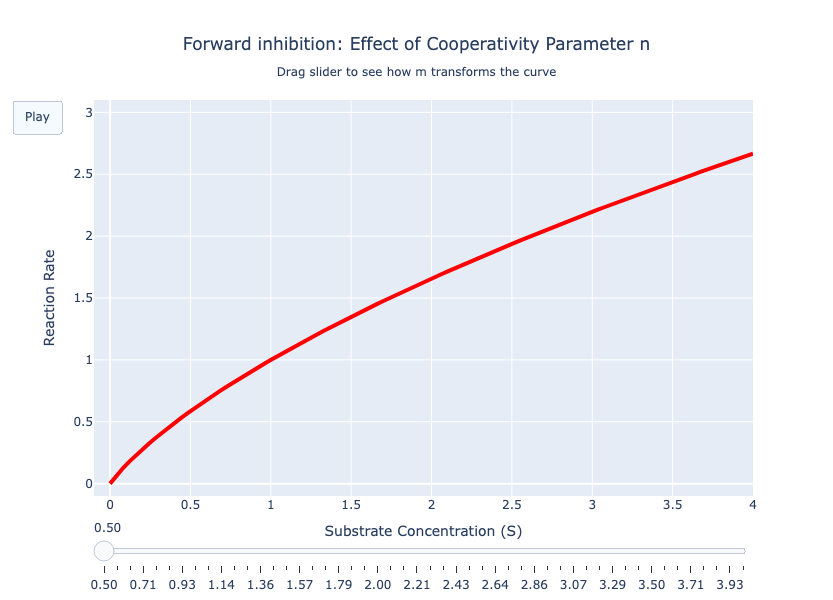

In [2]:
def forward_inhibition_kinetics(S, k_max, K_m, n, m):
    """
    Hill kinetics equation; reduces to Michaelis-Menten for n=1
    S: substrate concentration
    k_max: maximum reaction rate (includes enzyme concentration)
    K_m: Michaelis constant (fixed at 1)
    n: Hill exponent
    m: inhibition exponent (n<=m)
    """

    rate = (k_max * S**n) / (K_m + S**m)
    
    return rate

k_max, K_m, n = 2, 1, 1

S_values = linspace(0, 4, 100)  # substrate range

frames = []

m_animation = linspace(0.5, 4, 50)

for m_val in m_animation:
    rate_curve = forward_inhibition_kinetics(S_values, k_max, K_m, n, m_val)

    frames.append(go.Frame(
        data=[go.Scatter(
            x=S_values, 
            y=rate_curve,
            mode='lines',
            line=dict(color='red', width=4),
            name=f'm = {m_val:.2f}'
        )],
        name=f"m={m_val:.2f}"
    ))


# Create the animation figure
fig_animation = go.Figure(
    data=[go.Scatter(
        x=S_values, 
        y=forward_inhibition_kinetics(S_values, k_max, K_m, n, m_animation[0]),
        mode='lines',
        line=dict(color='red', width=4),
        name='Rate'
    )],
    layout=go.Layout(
        title=dict(
            text="Forward inhibition: Effect of Cooperativity Parameter n<br><sub>Drag slider to see how m transforms the curve</sub>",
            x=0.5
        ),
        xaxis=dict(title="Substrate Concentration (S)", range=[-0.1, S_values[-1]]),
        yaxis=dict(title="Reaction Rate", range=[-0.1, 3.1]),
        width=600,    # Figure width in pixels
        height=600,
        updatemenus=[dict(
            type="buttons",
            buttons=[dict(label="Play",
                         method="animate",
                         args=[None, {"frame": {"duration": 100, "redraw": True},
                                     "fromcurrent": True}])]
        )],
        sliders=[dict(
            steps=[dict(method="animate",
                       args=[[f"m={m_val:.2f}"],
                             {"mode": "immediate",
                              "frame": {"duration": 100, "redraw": True},
                              "transition": {"duration": 0}}],
                       label=f"{m_val:.2f}") for m_val in m_animation]
        )]

    ),
    frames=frames
)

fig_animation.show()


In [3]:
from numpy import linspace
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider, VBox
import plotly.graph_objects as go

def kinetics(S, k_max, K_m, n, m):
    """
    Hill kinetics equation; reduces to Michaelis-Menten for n=1
    S: substrate concentration
    k_max: maximum reaction rate (includes enzyme concentration)
    K_m: Michaelis constant (fixed at 1)
    n: Hill exponent
    m: inhibition exponent (n<=m)
    """
    rate = (k_max * S**n) / (K_m + S**m)
    return rate

# Fixed parameters
k_max, K_m = 2, 1
S_values = linspace(0, 4, 100)

# Create the interactive plot
def plot_kinetics(n, m):
    """Update plot based on slider values"""
    rate_curve = kinetics(S_values, k_max, K_m, n, m)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=S_values,
        y=rate_curve,
        mode='lines',
        line=dict(color='red', width=4),
        name=f'n={n:.2f}, m={m:.1f}'
    ))
    
    fig.update_layout(
        title=dict(
            text=f"Forward Inhibition Kinetics<br><sub>n (Hill) = {n:.2f}, m (inhibition) = {m:.2f}</sub>",
            x=0.5
        ),
        xaxis=dict(title="Substrate Concentration (S)", range=[-0.1, 4.1]),
        yaxis=dict(title="Reaction Rate", range=[-0.1, 3.5]),
        width=500,
        height=400,
        showlegend=False
    )
    
    fig.show()

# Create sliders with ipywidgets
interact(
    plot_kinetics,
    n=FloatSlider(
        value=1.0,
        min=1.0,
        max=4.0,
        step=0.1,
        description='n (Hill):',
        continuous_update=True,  # False: update when slider is released
        style={'description_width': '100px'}
    ),
    m=FloatSlider(
        value=1.0,
        min=1.0,
        max=4.0,
        step=0.1,
        description='m (inhib):',
        continuous_update=False,
        style={'description_width': '100px'}
    )
);

interactive(children=(FloatSlider(value=1.0, description='n (Hill):', max=4.0, min=1.0, style=SliderStyle(desc…

In [4]:
from numpy import linspace
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider, VBox
import plotly.graph_objects as go

def kinetics(S, k_max, K_m, n, m):
    """
    Hill kinetics equation; reduces to Michaelis-Menten for n=1
    S: substrate concentration
    k_max: maximum reaction rate (includes enzyme concentration)
    K_m: Michaelis constant (fixed at 1)
    n: Hill exponent
    m: inhibition exponent (n<=m)
    """
    rate = (k_max * S**n) / (K_m + S**m)
    return rate

# Fixed parameters
k_max, K_m = 2, 1
S_values = linspace(0, 4, 100)

# Create the interactive plot
def plot_kinetics(n, m):
    """Update plot based on slider values"""
    rate_curve = kinetics(S_values, k_max, K_m, n, m)
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=S_values,
        y=rate_curve,
        mode='lines',
        line=dict(color='red', width=4),
        name=f'n={n:.2f}, m={m:.2f}'
    ))
    
    fig.update_layout(
        title=dict(
            text=f"Forward Inhibition Kinetics<br><sub>n (Hill) = {n:.2f}, m (inhibition) = {m:.2f}</sub>",
            x=0.5
        ),
        xaxis=dict(title="Substrate Concentration (S)", range=[-0.1, 4.1]),
        yaxis=dict(title="Reaction Rate", range=[-0.1, 3.5]),
        width=700,
        height=600,
        showlegend=False
    )
    
    fig.show()

# Create sliders with ipywidgets
interact(
    plot_kinetics,
    n=FloatSlider(
        value=1.0,
        min=1.0,
        max=5.0,
        step=0.1,
        description='n (Hill):',
        continuous_update=False,  # Only update when slider is released
        style={'description_width': '100px'}
    ),
    m=FloatSlider(
        value=1.0,
        min=0.5,
        max=4.0,
        step=0.1,
        description='m (inhib):',
        continuous_update=False,
        style={'description_width': '100px'}
    )
);

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='n (Hill):', max=5.0, min=1.…